## Modelo de Regressão Linear

Esse modelo é dividido em partes, são elas:

### 1. Hipótese (Modelo)

A hipótese $h_\theta(x)$ representa a função que o modelo está tentando aprender para mapear as entradas ($x$) para as saídas ($y$). Na Regressão Linear com múltiplas variáveis (ou uma única variável), ela é um modelo linear:

$$h_\theta(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n = \sum_{i=0}^{n} \theta_i x_i$$

Em notação vetorial, onde $\mathbf{\theta}$ é o vetor de parâmetros e $\mathbf{x}$ é o vetor de características (assumindo que $x_0=1$ para o termo de interceptação $\theta_0$):

$$h_\theta(\mathbf{x}) = \mathbf{\theta}^T \mathbf{x}$$

### 2. Função de Custo (Compute Cost)

A função de custo $J(\theta)$ mede a precisão da hipótese comparando as previsões $h_\theta(x^{(i)})$ com os valores reais $y^{(i)}$ nos $m$ exemplos de treinamento. O objetivo é minimizar esta função. A forma mais comum é o **Erro Quadrático Médio (Mean Squared Error - MSE)**:

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2$$

### 3. Gradiente Descendente (Gradient Descent)

O Gradiente Descendente é um algoritmo iterativo para encontrar os valores dos parâmetros $\theta$ que minimizam a função de custo $J(\theta)$. Ele atualiza cada parâmetro $\theta_j$ simultaneamente em cada passo:

**Repita até convergir:**

$$\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta)$$

Onde $\alpha$ é a taxa de aprendizado (learning rate).

Para a Regressão Linear, a derivada parcial é:

$$\frac{\partial}{\partial \theta_j} J(\theta) = \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)}$$

Portanto, a regra de atualização para cada parâmetro $\theta_j$ é:

$$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)}$$

### 4. Método de Newton (para minimização)

O Método de Newton é uma alternativa ao Gradiente Descendente, geralmente mais rápido para convergir, especialmente com um grande número de características, mas com um custo computacional maior por iteração devido à necessidade de calcular e inverter a matriz Hessiana.

A regra de atualização vetorial para o Método de Newton é:

$$\theta := \theta - H^{-1} \nabla_\theta J(\theta)$$

Onde:
* $\nabla_\theta J(\theta)$ é o **vetor gradiente** da função de custo $J(\theta)$, contendo todas as derivadas parciais:
    $$\nabla_\theta J(\theta) = \begin{bmatrix} \frac{\partial J}{\partial \theta_0} \\ \frac{\partial J}{\partial \theta_1} \\ \vdots \\ \frac{\partial J}{\partial \theta_n} \end{bmatrix}$$
* $H$ é a **matriz Hessiana**, uma matriz $(n+1) \times (n+1)$ de segundas derivadas parciais:
    $$H_{jk} = \frac{\partial^2 J(\theta)}{\partial \theta_j \partial \theta_k}$$


## Padronização (Z-Score)

A Padronização, utilizando o Z-Score, é uma técnica de pré-processamento de dados que transforma as características para que elas tenham uma **média de zero** e um **desvio-padrão de um**.

### 1. Fórmula do Z-Score (Padronização)

Para cada ponto de dados $x_j$ (o valor da característica $j$), a transformação é feita subtraindo a média da característica ($\mu_j$) e dividindo pelo desvio-padrão ($\sigma_j$).

$$x'_j = \frac{x_j - \mu_j}{\sigma_j}$$

Onde:
* $x'_j$: O novo valor padronizado (Z-Score).
* $\mu_j$: Média dos valores da característica $j$ no conjunto de treinamento.
* $\sigma_j$: Desvio-padrão dos valores da característica $j$ no conjunto de treinamento.

### 2. Por Que Padronizar na Regressão Linear

A padronização é especialmente crucial quando o modelo de Regressão Linear é treinado utilizando o algoritmo de **Gradiente Descendente**.

| Aspecto | Explicação Breve |
| :--- | :--- |
| **Velocidade de Convergência** | Sem padronização, a função de custo $J(\theta)$ fica alongada e o Gradiente Descendente tem dificuldade em convergir rapidamente, podendo oscilar. A padronização centraliza a função de custo , permitindo uma convergência **muito mais rápida**. |
| **Importância Equilibrada** | A padronização garante que variáveis com escalas muito diferentes (e.g., "área da casa" em metros quadrados e "número de quartos") sejam tratadas de forma **equitativa**. Caso contrário, a variável com maior magnitude numérica pode dominar a função de custo. |

* **Observação:** Se o modelo for resolvido usando a **Equação Normal** (solução de forma fechada, não iterativa), a padronização não é estritamente necessária para obter a solução correta dos parâmetros $\theta$, mas ainda é útil para a interpretabilidade dos coeficientes.



In [1]:
import numpy as np
from sklearn.datasets import make_regression

X, y = make_regression(noise=20, random_state=42, n_features=1)

In [2]:
def hypothesis(X,theta) -> np.ndarray:
    return np.dot(X,theta) # product of matrices

def compute_cost(X,y,theta) -> float:
    m = len(y)
    predictions = hypothesis(X,theta)
    sq_errors = (predictions - y) ** 2
    J = 1/2 * (1/m) * np.sum(sq_errors) # compute cost j(theta)
    return J

def gradient_descent(X,y,theta,alpha,num_iters) -> tuple:
    m = len(y)
    j_history = []

    for i in range(num_iters):
        predictions = hypothesis(X,theta)
        errors = predictions - y
        theta = theta - (alpha/m) * (X.T.dot(errors))
        j_history.append(compute_cost(X,y,theta))

    return theta, j_history # return final parameters and cost history

def newton_method(X,y,theta,num_iters) -> tuple:
    m = len(y)
    j_history = []

    for i in range (num_iters):
        predictions = hypothesis(X,theta)
        errors = predictions - y
        gradient = (1/m) * (X.T.dot(errors))
        hessian = (1/m) * (X.T.dot(X))
        theta = theta - np.linalg.inv(hessian).dot(gradient)
        j_history.append(compute_cost(X,y,theta))

    return theta, j_history 

def padronize_column(column) -> np.ndarray:
    mean = np.mean(column)
    std = np.std(column)
    return (column - mean) / std # padronizing data of column
    
# Preparing data

X = X.reshape(-1,1) # feature matrix, reshaped to be a 2D array
y = y.reshape(-1,1) # target vector, reshaped to be a 2D array

m = len(y) # number of training examples
X_b = np.c_[np.ones((m,1)), X]  # add bias term
X_b[:,1] = padronize_column(X_b[:,1]) # padronizing feature column
X = padronize_column(X) 
y = padronize_column(y) # padronizing target column
theta_initial = np.zeros((2,1)) # initial theta parameters randomly set to zero
alpha = 0.05 # learning rate
num_iters = 800 # number of iterations for gradient descent

theta_final_gradient, j_history_gradient = gradient_descent(X_b,y,theta_initial,alpha,num_iters) # run gradient descent

theta_final_newton, j_history_newton = newton_method(X_b,y,theta_initial,num_iters) # run newton method

print(f"""Final theta parameters of gradient descent, theta 0 and theta 1 ,respectively: {theta_final_gradient.ravel()}
Final theta parameters of newton method, theta 0 and theta 1 ,respectively: {theta_final_newton.ravel()}""") # ravel to print as 1D array

Final theta parameters of gradient descent, theta 0 and theta 1 ,respectively: [-2.73114864e-17  9.23663471e-01]
Final theta parameters of newton method, theta 0 and theta 1 ,respectively: [-9.33093381e-18  9.23663471e-01]


In [3]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from src.regression import LinearRegression_

linear_scratch = LinearRegression_()
linear_scratch.fit(X,y)

print(f"scratch model coefficients: intercept/theta 0 = {linear_scratch._intercept}, slope/theta 1 = {linear_scratch._coef}")

custo = linear_scratch.cost_history

scratch model coefficients: intercept/theta 0 = -1.8523475879227657e-18, slope/theta 1 = [0.92366347]


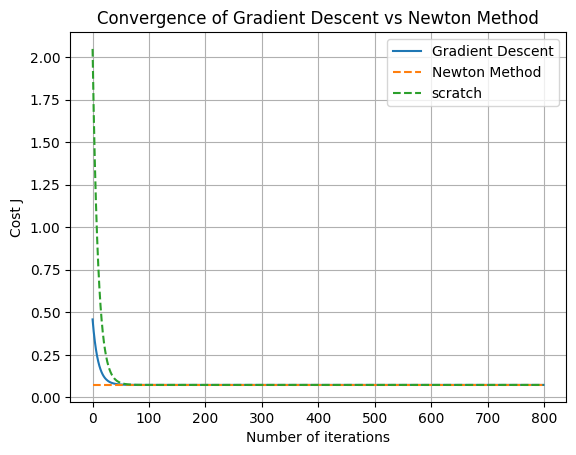

In [4]:
import matplotlib.pyplot as plt

plt.plot(range(len(j_history_gradient)), j_history_gradient)
plt.plot(range(len(j_history_newton)), j_history_newton, ls ="--")
plt.plot(range(len(custo)), custo, ls ="--")
plt.xlabel("Number of iterations")
plt.ylabel("Cost J")
plt.title("Convergence of Gradient Descent vs Newton Method")
plt.legend(["Gradient Descent", "Newton Method", 'scratch'])
plt.grid(True)
plt.show()

In [5]:
from sklearn.linear_model import LinearRegression

linear_sklearn = LinearRegression()
linear_sklearn.fit(X,y)

print(f"Sklearn model coefficients: intercept/theta 0 = {linear_sklearn.intercept_[0]}, slope/theta 1 = {linear_sklearn.coef_[0][0]}")

Sklearn model coefficients: intercept/theta 0 = -2.4348621553882147e-17, slope/theta 1 = 0.9236634708149837


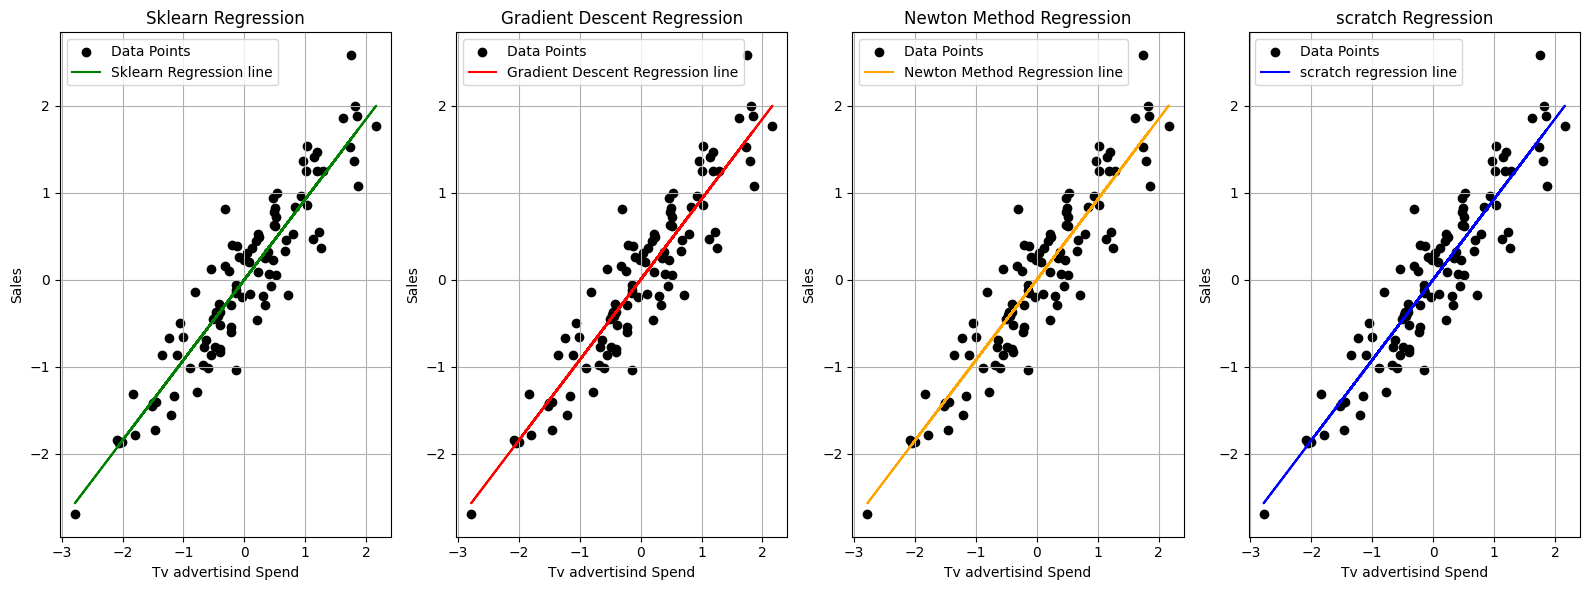

In [6]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(16, 6))

models = [
    LinearRegression().fit(X,y).predict(X),
    hypothesis(X_b,theta_final_gradient),
    hypothesis(X_b,theta_final_newton),
    LinearRegression_().fit(X,y).predict(X)
]

name_models = ['Sklearn Regression', 'Gradient Descent Regression', 'Newton Method Regression', 'scratch regression']
colors = ['green', 'red', 'orange', 'blue']

for i,model in enumerate(models):
    axs[i].scatter(X, y, color='black', label='Data Points')
    axs[i].plot(X, model, color= f'{colors[i]}', label=f'{name_models[i]} line')
    axs[i].set_xlabel("Tv advertisind Spend")
    axs[i].set_ylabel("Sales")
    axs[i].grid(True)
    axs[i].legend()
    if i == 0:
        axs[i].set_title("Sklearn Regression")
    elif i == 1:
        axs[i].set_title("Gradient Descent Regression")
    elif i == 2:
        axs[i].set_title("Newton Method Regression")
    elif i == 3:
        axs[i].set_title("scratch Regression")

plt.tight_layout()
plt.show()

In [7]:
from sklearn.metrics import mean_squared_error

mse_gradient = mean_squared_error(y,hypothesis(X_b,theta_final_gradient))
mse_sklearn = mean_squared_error(y, linear_sklearn.predict(X))
mse_newton = mean_squared_error(y,hypothesis(X_b,theta_final_newton))
mse_scratch = mean_squared_error(y, linear_scratch.predict(X))

print(f"gradient: {mse_gradient}; sklearn: {mse_sklearn}; newton: {mse_newton}; scratch: {mse_scratch}")

gradient: 0.14684579268201803; sklearn: 0.14684579268201803; newton: 0.14684579268201803; scratch: 0.14684579268201803


In [8]:
some_data = np.array([[0.2]]) 
some_data = some_data.reshape(-1,1)

some_data_with_bias = np.c_[np.ones(1), some_data]

print(f"""modelo feito no notebook: {hypothesis(some_data_with_bias, theta_final_newton)}
modelo do sklearn: {linear_sklearn.predict(some_data)}
modelo feito do zero: {linear_scratch.predict(some_data)}""")

modelo feito no notebook: [[0.18473269]]
modelo do sklearn: [[0.18473269]]
modelo feito do zero: [0.18473269]
